# Random Forest assignment 2

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [43]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [44]:
df.shape

(600, 6)

In [45]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [46]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


<Axes: xlabel='Undergrad', ylabel='Taxable.Income'>

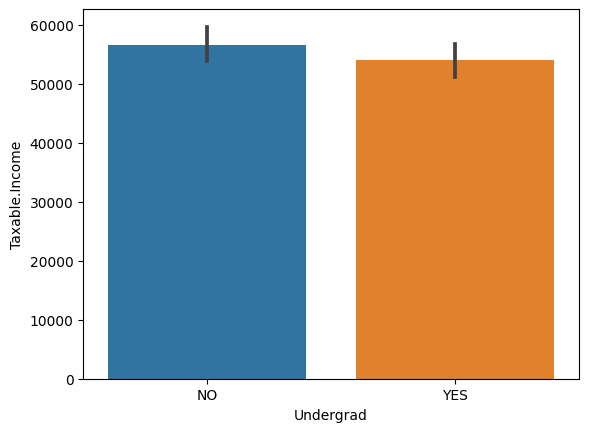

In [48]:
# Sales by Shelveloc
sns.barplot(data=df,x = df['Undergrad'],y = df['Taxable.Income'])

In [49]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [52]:
df.insert(6,"Tax_Status"," ")

In [53]:
for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i] <= 30000:
        df['Tax_Status'].iloc[i] = "Risky"
    else:
        df['Tax_Status'].iloc[i] = "Good"    



In [54]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Status,Tax-Status
0,NO,Single,68833,50047,10,YES,Good,
1,YES,Divorced,33700,134075,18,YES,Good,
2,NO,Married,36925,160205,30,YES,Good,
3,YES,Single,50190,193264,15,YES,Good,
4,NO,Married,81002,27533,28,NO,Good,


<Axes: xlabel='Tax_Status', ylabel='Taxable.Income'>

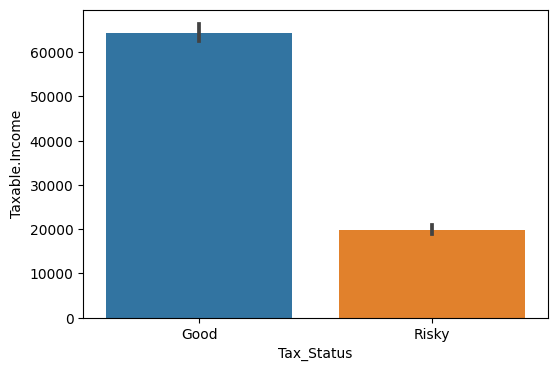

In [55]:
# Sales for Sales_Status as Good and Low

plt.figure(figsize = (6,4))
sns.barplot(data=df, x = df['Tax_Status'], y = df['Taxable.Income'])

<Axes: xlabel='Tax-Status', ylabel='City population'>

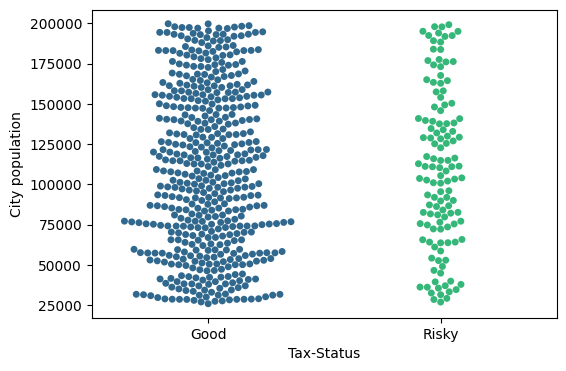

In [56]:
# Sales_Staus based on Company_Price

plt.figure(figsize=(6,4))
plt.xlabel("Tax-Status")
plt.ylabel("City population")
sns.swarmplot(data=df,x = df['Tax_Status'], y = df['City.Population'],palette='viridis')

<Axes: xlabel='Tax-Status', ylabel='Work.Experience'>

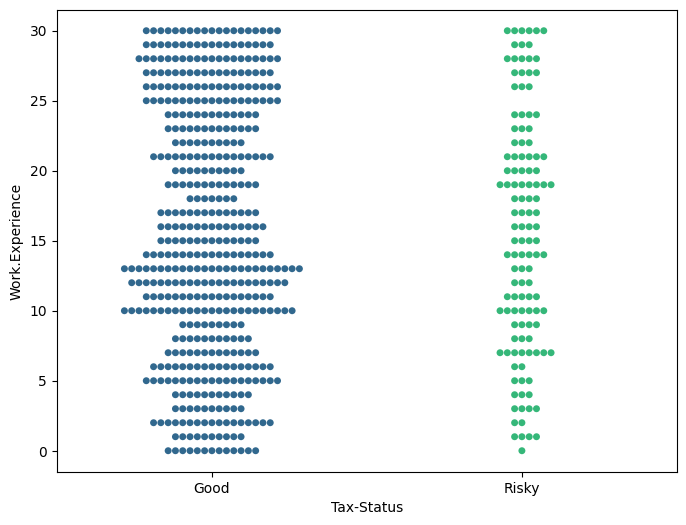

In [57]:
# Sales_Staus based on Company_Price

plt.figure(figsize=(8,6))
plt.xlabel("Tax-Status")
plt.ylabel("Work.Experience")
sns.swarmplot(data=df,x = df['Tax_Status'], y = df['Work.Experience'],palette='viridis')

In [58]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Status,Tax-Status
0,NO,Single,68833,50047,10,YES,Good,
1,YES,Divorced,33700,134075,18,YES,Good,
2,NO,Married,36925,160205,30,YES,Good,
3,YES,Single,50190,193264,15,YES,Good,
4,NO,Married,81002,27533,28,NO,Good,


<Axes: >

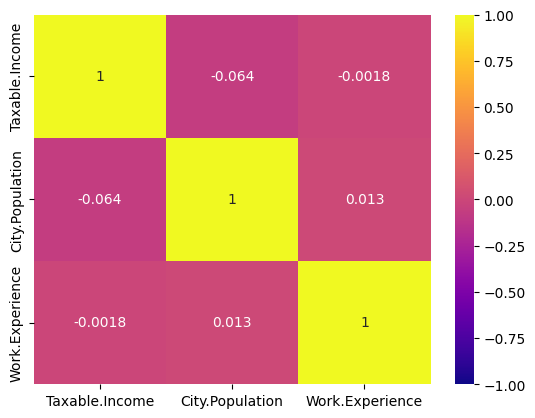

In [59]:
# Checking the correlation between each numerical columns

sns.heatmap(df.iloc[:,2:5].corr(),annot=True,vmax=1,vmin=-1,cmap='plasma')

In [60]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Status,Tax-Status
0,NO,Single,68833,50047,10,YES,Good,
1,YES,Divorced,33700,134075,18,YES,Good,
2,NO,Married,36925,160205,30,YES,Good,
3,YES,Single,50190,193264,15,YES,Good,
4,NO,Married,81002,27533,28,NO,Good,


In [61]:
# Converting the Categorical into Numerical data

# Encoding the Data from categorical to Numeric columns

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Undergrad'] = encode.fit_transform(df['Undergrad'])
df['Marital.Status'] = encode.fit_transform(df['Marital.Status'])
df['Urban'] = encode.fit_transform(df['Urban'])
df['Tax_Status'] = encode.fit_transform(df['Tax_Status'])

In [62]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Status,Tax-Status
0,0,2,68833,50047,10,1,0,
1,1,0,33700,134075,18,1,0,
2,0,1,36925,160205,30,1,0,
3,1,2,50190,193264,15,1,0,
4,0,1,81002,27533,28,0,0,


In [63]:
df = df.drop(columns=['Taxable.Income','Tax-Status'])

In [68]:
# Spliting the data into independent and dependent variable

x = df.iloc[:,:-1]
x
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Status, Length: 600, dtype: int32

In [69]:
# Chekcing the Accuracy usinf kfold and cross_val_score

from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,max_features=5)
k = KFold(n_splits=5)
result = cross_val_score(model,x,y,cv = k)
print(np.mean(result))

0.7383333333333333


In [70]:
# Creating model with train and test data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(X_train.head())
print(y_train.head())

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
580          1               0           123335                1      1
175          1               2            57055               13      0
358          1               2            96432               24      1
228          0               1           100696                9      1
0      0
580    0
175    0
358    0
228    1
Name: Tax_Status, dtype: int32


In [71]:
num_tree = 100
max_feature = 5

random = RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
random.fit(X_train,y_train)


RandomForestClassifier(max_features=5)

the Accuracy Score 76.66666666666667
the Classification Report               precision    recall  f1-score   support

           0       0.84      0.89      0.87       102
           1       0.08      0.06      0.07        18

    accuracy                           0.77       120
   macro avg       0.46      0.47      0.47       120
weighted avg       0.73      0.77      0.75       120



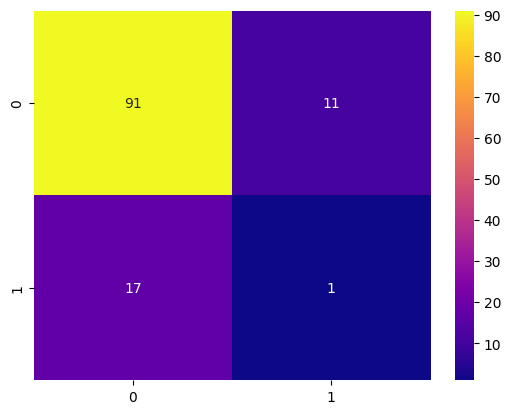

In [72]:
# Checking the accuracy of the model on Testing dataset

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("the Accuracy Score",accuracy_score(y_test,random.predict(X_test)) * 100)

sns.heatmap(confusion_matrix(y_test,random.predict(X_test)),cmap='plasma',annot=True)

print('the Classification Report',classification_report(y_test,random.predict(X_test)))